# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []


# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#define the unit to metric
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units="+ units
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
            
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fez
Processing Record 2 of Set 1 | yarada
Processing Record 3 of Set 1 | nishihara
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | cuauhtemoc
Processing Record 6 of Set 1 | kinablangan
Processing Record 7 of Set 1 | varhaug
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | hirara
Processing Record 11 of Set 1 | shenjiamen
Processing Record 12 of Set 1 | nioro
Processing Record 13 of Set 1 | maltahohe
Processing Record 14 of Set 1 | airai
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | mahon
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | luanda
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | tevaitoa
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 |

City not found. Skipping...
Processing Record 37 of Set 4 | rzhev
Processing Record 38 of Set 4 | apastovo
Processing Record 39 of Set 4 | sehithwa
Processing Record 40 of Set 4 | samusu
City not found. Skipping...
Processing Record 41 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 4 | saint george
Processing Record 43 of Set 4 | sorkjosen
Processing Record 44 of Set 4 | alta floresta
Processing Record 45 of Set 4 | marcona
City not found. Skipping...
Processing Record 46 of Set 4 | qaqortoq
Processing Record 47 of Set 4 | kongoussi
Processing Record 48 of Set 4 | hualmay
Processing Record 49 of Set 4 | lavrentiya
Processing Record 0 of Set 5 | sokolka
Processing Record 1 of Set 5 | qandala
Processing Record 2 of Set 5 | sola
Processing Record 3 of Set 5 | vestmannaeyjar
Processing Record 4 of Set 5 | palermo
Processing Record 5 of Set 5 | kem
Processing Record 6 of Set 5 | biak
Processing Record 7 of Set 5 | cayenne
Processing Record 8 of Set

Processing Record 26 of Set 8 | rocha
Processing Record 27 of Set 8 | akdagmadeni
Processing Record 28 of Set 8 | amahai
Processing Record 29 of Set 8 | ostrovnoy
Processing Record 30 of Set 8 | agua dulce
Processing Record 31 of Set 8 | yuzhno-sukhokumsk
Processing Record 32 of Set 8 | makakilo city
Processing Record 33 of Set 8 | marsh harbour
Processing Record 34 of Set 8 | doka
Processing Record 35 of Set 8 | hommelvik
Processing Record 36 of Set 8 | kieta
Processing Record 37 of Set 8 | unity
Processing Record 38 of Set 8 | adrar
Processing Record 39 of Set 8 | baboua
City not found. Skipping...
Processing Record 40 of Set 8 | tarakan
Processing Record 41 of Set 8 | gberia fotombu
Processing Record 42 of Set 8 | seddon
Processing Record 43 of Set 8 | najran
Processing Record 44 of Set 8 | bauchi
Processing Record 45 of Set 8 | davila
Processing Record 46 of Set 8 | upernavik
Processing Record 47 of Set 8 | namatanai
Processing Record 48 of Set 8 | paamiut
Processing Record 49 of S

Processing Record 14 of Set 12 | ustye
Processing Record 15 of Set 12 | quelimane
Processing Record 16 of Set 12 | lazarev
Processing Record 17 of Set 12 | warqla
City not found. Skipping...
Processing Record 18 of Set 12 | limbang
Processing Record 19 of Set 12 | kiruna
Processing Record 20 of Set 12 | yamada
Processing Record 21 of Set 12 | lodja
Processing Record 22 of Set 12 | frontera
Processing Record 23 of Set 12 | plouzane
Processing Record 24 of Set 12 | bargal
City not found. Skipping...
Processing Record 25 of Set 12 | pangody
Processing Record 26 of Set 12 | pontes e lacerda
Processing Record 27 of Set 12 | bairiki
Processing Record 28 of Set 12 | haifa
Processing Record 29 of Set 12 | jabiru
City not found. Skipping...
Processing Record 30 of Set 12 | ust-omchug
Processing Record 31 of Set 12 | vikindu
Processing Record 32 of Set 12 | pontianak
Processing Record 33 of Set 12 | trairi
Processing Record 34 of Set 12 | kampong thum
Processing Record 35 of Set 12 | bulawayo
Pr

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fez,34.0372,-4.9998,11.14,93,0,3.09,MA,1678520967
1,yarada,17.6500,83.2667,32.18,40,0,5.66,IN,1678521050
2,nishihara,26.1842,127.7558,22.60,60,40,6.69,JP,1678521050
3,cuauhtemoc,28.4167,-106.8667,10.08,40,0,3.31,MX,1678521050
4,kinablangan,7.6947,126.5503,27.76,77,40,5.65,PH,1678521051


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fez,34.0372,-4.9998,11.14,93,0,3.09,MA,1678520967
1,yarada,17.6500,83.2667,32.18,40,0,5.66,IN,1678521050
2,nishihara,26.1842,127.7558,22.60,60,40,6.69,JP,1678521050
3,cuauhtemoc,28.4167,-106.8667,10.08,40,0,3.31,MX,1678521050
4,kinablangan,7.6947,126.5503,27.76,77,40,5.65,PH,1678521051


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

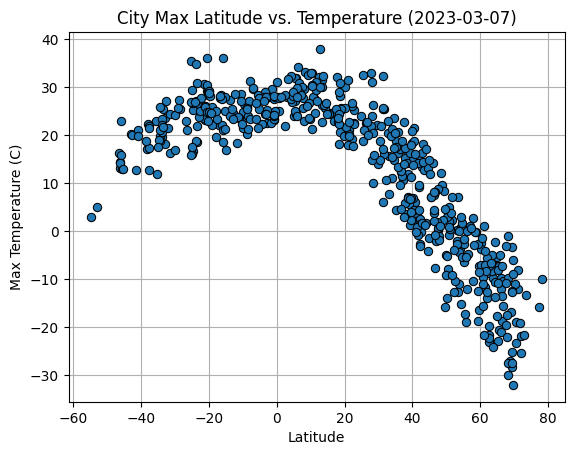

In [10]:
# Build scatter plot for latitude vs. temperature
plt.plot(city_data_df["Lat"], 
         city_data_df["Max Temp"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-03-07)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

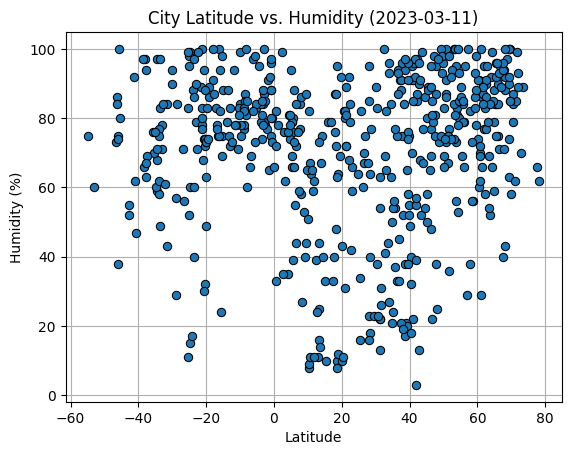

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.plot(city_data_df["Lat"], 
         city_data_df["Humidity"],
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-03-11)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

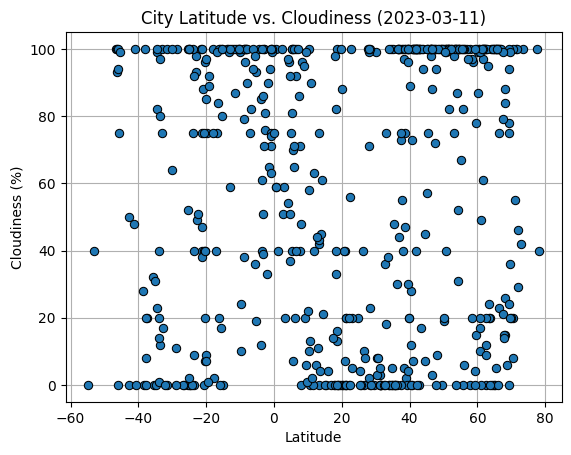

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.plot(city_data_df["Lat"], 
         city_data_df["Cloudiness"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-03-11)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

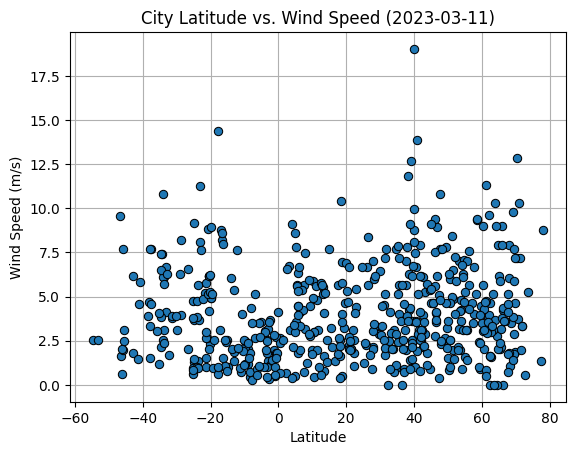

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.plot(city_data_df["Lat"], 
         city_data_df["Wind Speed"], 
         linestyle="none", 
         marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-03-11)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_c=.1, y_c=.9):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(x_c, y_c), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel ("Latitude")
    plt.ylabel (y_values.name)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [17]:

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fez,34.0372,-4.9998,11.14,93,0,3.09,MA,1678520967
1,yarada,17.6500,83.2667,32.18,40,0,5.66,IN,1678521050
2,nishihara,26.1842,127.7558,22.60,60,40,6.69,JP,1678521050
3,cuauhtemoc,28.4167,-106.8667,10.08,40,0,3.31,MX,1678521050
4,kinablangan,7.6947,126.5503,27.76,77,40,5.65,PH,1678521051


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,busselton,-33.6500,115.3333,25.46,49,12,6.13,AU,1678521051
7,rikitea,-23.1203,-134.9692,26.22,79,93,11.28,PF,1678521051
11,maltahohe,-24.8333,16.9833,25.19,15,0,3.68,NaN,1678521052
12,airai,-8.9266,125.4092,20.15,77,79,1.18,TL,1678521052
13,carnarvon,-24.8667,113.6333,26.75,60,0,9.19,AU,1678521052


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.8387335273602887


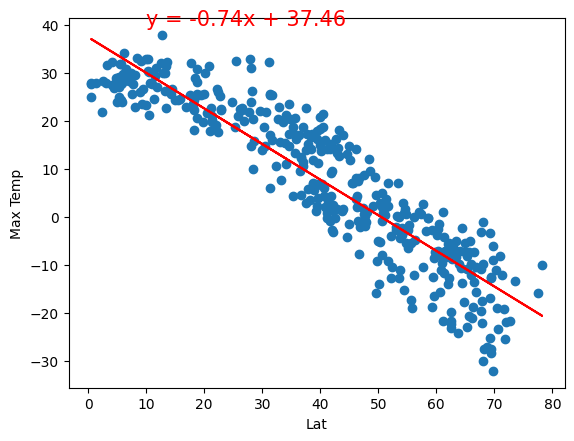

In [30]:
# Linear regression on Northern Hemisphere
north = city_data_df['Lat'] >= 0
northernHem = city_data_df[north]

x_values = northernHem['Lat']
y_values = northernHem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()

The r-value is 0.5867454184723044


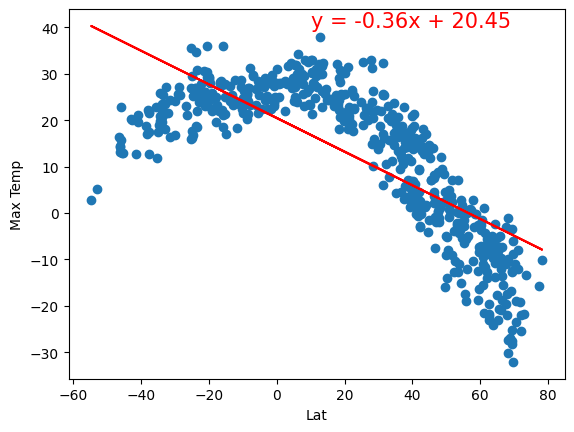

In [35]:
# Linear regression on Southern Hemisphere
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Lat')
plt.ylabel('Max Temp')
print(f"The r-value is {rvalue**2}")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere:

The relationship between latitude and max tempuratures displays a strong negative correlation.
The r-value is ~ -0.74 (rounded up)



Southern Hemisphere:

There is no correlation between latitude and max tempuratures
The r-value is ~ -0.36 (rounded up)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.8387335273602887


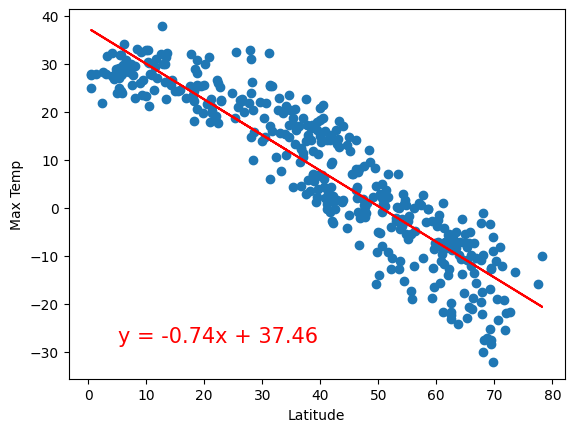

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.1, 0.1)

The r-value is: 0.33300220503615885


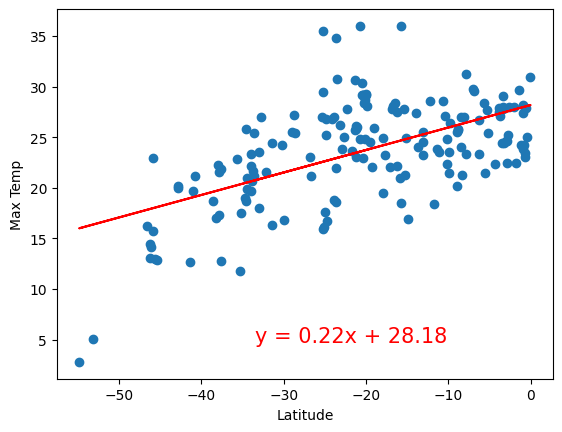

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression(x_values, y_values, 0.4, 0.1)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere:

There is no correlation between latitude and humidity
The r-value is ~ -0.74 (rounded up)

Southern Hemisphere:

There is no correlation between latitude and humidity
The r-value is ~ 0.22 (rounded up)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04801377286585755


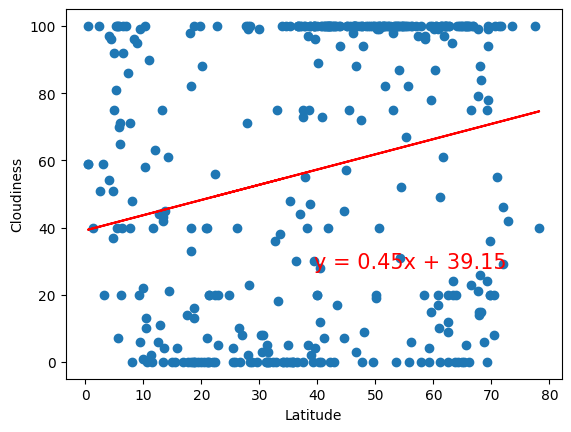

In [38]:

# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression(x_values, y_values, 0.5, 0.3)

The r-value is: 0.09884171406256291


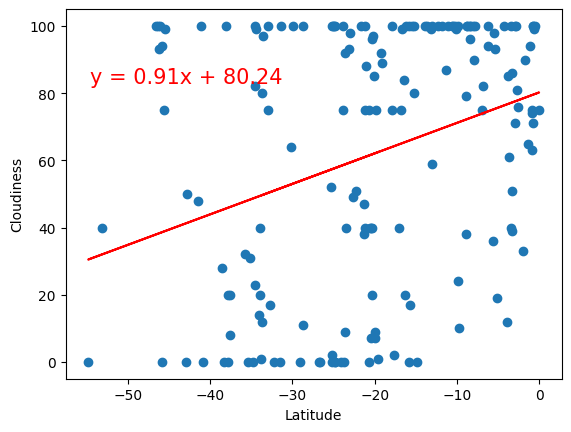

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression(x_values, y_values, 0.05, 0.8)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere:

There is no correlation between Latitude and Cloudliness
The r-value is ~ 0.45 (rounded up)

Southern Hemisphere:

There is no correlation between Latitude and Cloudliness
The r-value is ~ 0.91 (rounded up)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008707776489707972


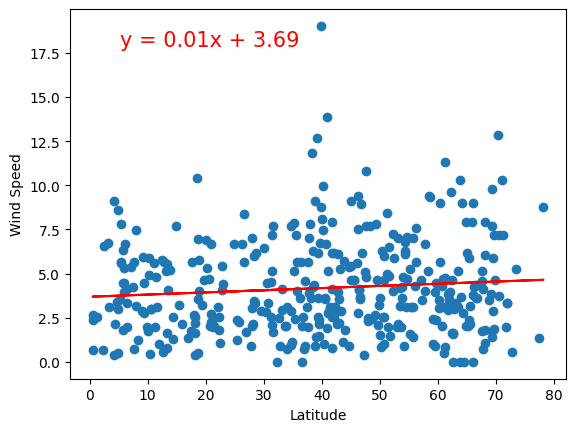

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values)

The r-value is: 0.06854001495977571


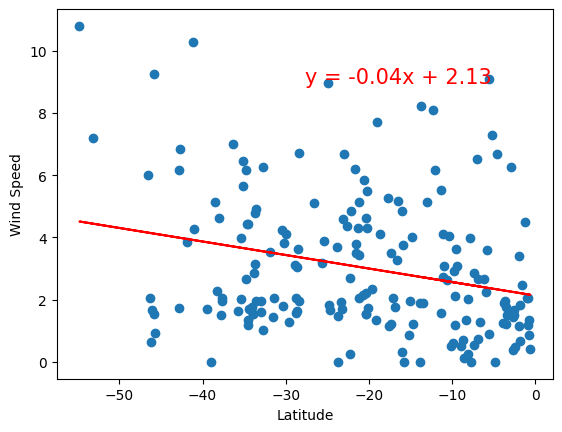

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression(x_values, y_values, 0.5, 0.8)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern Hemisphere:

There is no correlation between Latitude and Wind Speed
The r-value is  0.01 (rounded up)


Southern Hemisphere:

There is no correlation between Latitude and Wind Speed
The r-value is - 0.04 (rounded up)